In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

C:\Users\nmims.student\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("D:\Data\cars.csv")

In [3]:
df.head()

,price,brand,model,year,title_status,mileage,color,state,country
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,new jersey,usa
1,2899,ford,se,2011,tbd,190552,silver,tennessee,usa
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,georgia,usa
3,25000,ford,door,2014,clean vehicle,64146,blue,virginia,usa
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,florida,usa


In [4]:
# now check for missing values if any

In [5]:
len(df.index)

2499

In [6]:
missing_data = df.isnull()
missing_data.sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
country         0
dtype: int64

In [7]:
df.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


In [8]:
df = df.loc[~((df['price'] == 0))]

In [9]:
df.describe()

,price,year,mileage
count,2456.000000,2456.000000,2.456000e+03
mean,19096.258550,2016.931189,5.011143e+04
std,11962.176006,2.957497,5.460446e+04
min,25.000000,1973.000000,0.000000e+00
25%,10500.000000,2016.000000,2.127675e+04
50%,17050.000000,2018.000000,3.504850e+04
75%,25800.000000,2019.000000,6.005075e+04
max,84900.000000,2020.000000,1.017936e+06


In [10]:
# all price rows with 0 value have been removed as we can see price min is 25. 0 has not been removed from any other columns like mileage

In [11]:
df = df[df['title_status'] != 'tbd']

In [12]:
df.head()

,price,brand,model,year,title_status,mileage,color,state,country
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,new jersey,usa
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,georgia,usa
3,25000,ford,door,2014,clean vehicle,64146,blue,virginia,usa
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,florida,usa
6,7300,chevrolet,pk,2010,clean vehicle,149050,black,georgia,usa


In [13]:
# we can see all tbd values along with those rows from title status columns have been removed

In [14]:
len(df.index)

2401

In [15]:
# from the decrease in row count from 2499 to 2401, we can see we dropped 98 columns by removing 0 from price and tbd from title status

In [16]:
print(df.dtypes)

price            int64
brand           object
model           object
year             int64
title_status    object
mileage          int64
color           object
state           object
country         object
dtype: object


In [17]:
# lets make dummy variable for country and title_status

In [18]:
df['country'].value_counts()

country
usa       2394
canada       7
Name: count, dtype: int64

In [19]:
df['title_status'].value_counts()

title_status
clean vehicle        2279
salvage insurance     122
Name: count, dtype: int64

In [20]:
df.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'state', 'country'],
      dtype='object')

In [21]:
dummy_variable_1 = pd.get_dummies(df["country"])
dummy_variable_1.head(10)

,canada,usa
0,False,True
2,False,True
3,False,True
4,False,True
6,False,True
7,False,True
8,False,True
9,False,True
10,False,True
11,False,True


In [22]:
dummy_variable_1.value_counts()

 canada   usa 
False    True     2394
True     False       7
Name: count, dtype: int64

In [23]:
dummy_variable_1.head()

,canada,usa
0,False,True
2,False,True
3,False,True
4,False,True
6,False,True


In [24]:
df = pd.concat([df, dummy_variable_1], axis=1)

In [25]:
df.head()

,price,brand,model,year,title_status,mileage,color,state,country,canada,usa
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,new jersey,usa,False,True
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,georgia,usa,False,True
3,25000,ford,door,2014,clean vehicle,64146,blue,virginia,usa,False,True
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,florida,usa,False,True
6,7300,chevrolet,pk,2010,clean vehicle,149050,black,georgia,usa,False,True


In [26]:
dummy_variable_2 = pd.get_dummies(df["title_status"])
dummy_variable_2.head(10)

,clean vehicle,salvage insurance
0,True,False
2,True,False
3,True,False
4,True,False
6,True,False
7,True,False
8,True,False
9,True,False
10,True,False
11,True,False


In [27]:
dummy_variable_2.value_counts()

clean vehicle  salvage insurance
True           False                2279
False          True                  122
Name: count, dtype: int64

In [28]:
dummy_variable_2.rename(columns={'clean vehicle':'ts-cv', 'salvage insurance':'ts-si'}, inplace=True)
dummy_variable_2.head()

,ts-cv,ts-si
0,True,False
2,True,False
3,True,False
4,True,False
6,True,False


In [29]:
df = pd.concat([df, dummy_variable_2], axis=1)

In [30]:
df.head()

,price,brand,model,year,title_status,mileage,color,state,country,canada,usa,ts-cv,ts-si
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,new jersey,usa,False,True,True,False
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,georgia,usa,False,True,True,False
3,25000,ford,door,2014,clean vehicle,64146,blue,virginia,usa,False,True,True,False
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,florida,usa,False,True,True,False
6,7300,chevrolet,pk,2010,clean vehicle,149050,black,georgia,usa,False,True,True,False


In [31]:
df.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'state', 'country', ' canada', ' usa', 'ts-cv', 'ts-si'],
      dtype='object')

In [32]:
# now 2 dummy variables have been created

In [33]:
cdf = df[['price','mileage']]

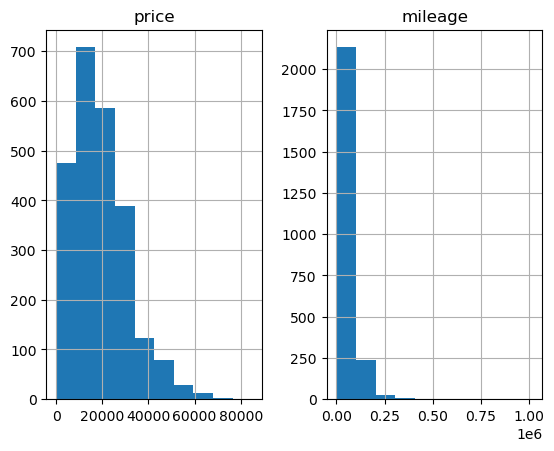

In [34]:
viz = cdf[['price','mileage']]
viz.hist()
plt.show()

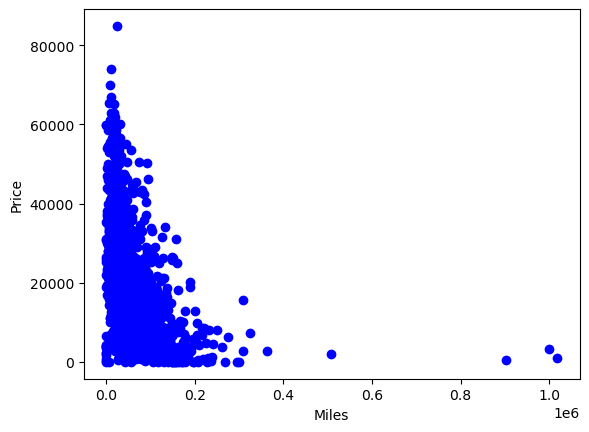

In [35]:
plt.scatter(cdf.mileage, cdf.price,  color='blue')
plt.xlabel("Miles")
plt.ylabel("Price")
plt.show()

In [36]:
msk = np.random.rand(len(df)) < 0.8
msk
train = cdf[msk]
test = cdf[~msk]

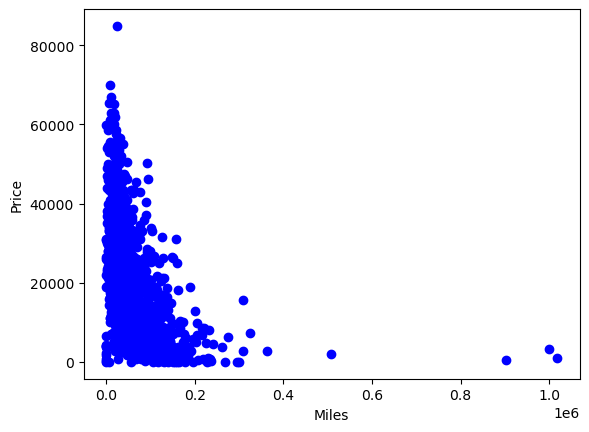

In [37]:
plt.scatter(train.mileage, train.price,  color='blue')
plt.xlabel("Miles")
plt.ylabel("Price")
plt.show()

In [38]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['mileage']])
train_y = np.asanyarray(train[['price']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.07919964]]
Intercept:  [23248.56483535]


Text(0, 0.5, 'price')

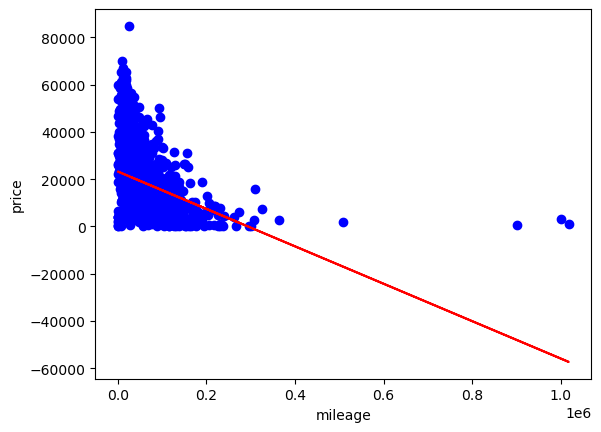

In [39]:
plt.scatter(train.mileage, train.price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("mileage")
plt.ylabel("price")

In [40]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['mileage']])
test_y = np.asanyarray(test[['price']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 8185.04
Residual sum of squares (MSE): 113048773.35
R2-score: 0.17


In [41]:
cdf = df[['price',' canada', ' usa', 'ts-cv', 'ts-si']]
cdf.head(9)

,price,canada,usa,ts-cv,ts-si
0,6300,False,True,True,False
2,5350,False,True,True,False
3,25000,False,True,True,False
4,27700,False,True,True,False
6,7300,False,True,True,False
7,13350,False,True,True,False
8,14600,False,True,True,False
9,5250,False,True,True,False
10,10400,False,True,True,False


In [42]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [43]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[[' canada', ' usa', 'ts-cv', 'ts-si']])
y = np.asanyarray(train[['price']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 5063.01330076 -5063.01330076  8371.7410852  -8371.7410852 ]]


In [44]:
from sklearn.metrics import r2_score

y_hat= regr.predict(test[[' canada', ' usa', 'ts-cv', 'ts-si']].values)
x = np.asanyarray(test[[' canada', ' usa', 'ts-cv', 'ts-si']])
y = np.asanyarray(test[['price']])

print("R2-score: %.2f" % r2_score(y , y_hat) )

R2-score: 0.12
